In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"
   
df = pd.read_csv(url)
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


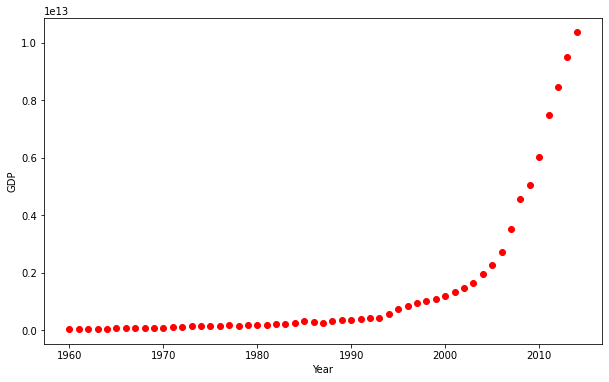

In [4]:
plt.figure(figsize=(10,6))
x_data, y_data = df['Year'].values, df['Value'].values

plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [5]:
x = np.asanyarray(df[['Year']]/df.Year.max())
y = np.asanyarray(df[['Value']]/df.Value.max())


In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [7]:
yhat = model.predict(x)

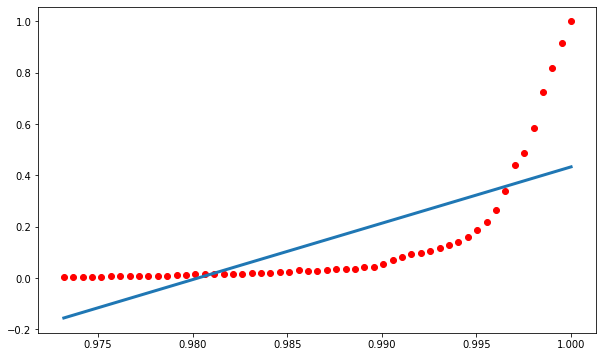

In [8]:
plt.figure(figsize=(10,6))
plt.plot(x, y, 'ro', label='data')
plt.plot(x, yhat, linewidth=3.0, label='fit')
plt.show()

In [12]:
from sklearn.metrics import mean_absolute_error
print("MAE:",mean_absolute_error(yhat, y))

MAE: 0.12657979406214762


In [15]:
x[0]

array([0.97318769])

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5, include_bias=False)

x_poly = poly_features.fit_transform(x)

In [17]:
model.fit(x_poly, y)

LinearRegression()

In [18]:
yhat = model.predict(x_poly)

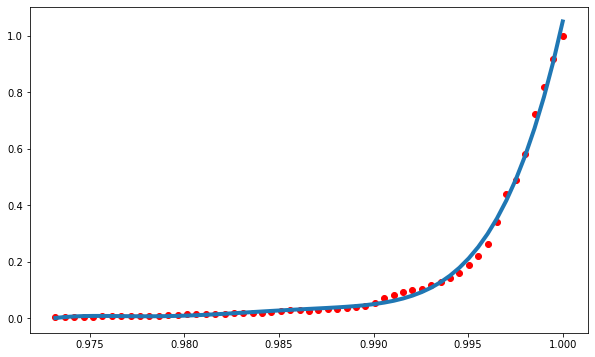

In [19]:
plt.figure(figsize=(10,6))
plt.plot(x, y, 'ro', label='data')
plt.plot(x, yhat, linewidth=4.0, label='fit')
plt.show()

In [20]:
print("mae:", mean_absolute_error(yhat, y))

mae: 0.009253921906050316


## `curve_fit`
'curve_fit' yordamida o'zimiz yozgan funksiyalar asosida model qurishimiz mumkin. 

Misol uchun, yuqoridagi ma'lumotlar Logistic regression funksiyasi yordamida aniqroq bashorat qilinishi mumkin.

# $$ \hat{Y} = \frac1{1+e^{-\beta_1(X-\beta_2)}}$$

Keling, logisti regression funksiyasini yozib olamiz:

In [22]:
x_data, y_data =df['Year'].values/df.Year.max(), df['Value'].values/df.Value.max()

In [23]:
def sigmoid(x, beta1, beta2):
  y = 1/(1+np.exp(-beta1*(x-beta2)))
  return y

In [24]:
from scipy.optimize import curve_fit

beta, pcov = curve_fit(sigmoid, x_data, y_data)

print(f"beta1={beta[0]}\nbeta2={beta[1]}")

beta1=690.4530189695057
beta2=0.9972071285916988


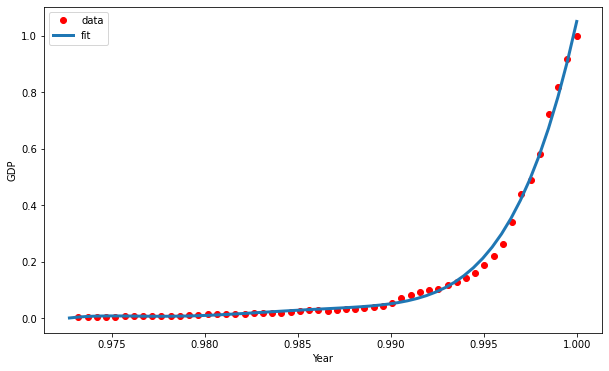

In [25]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(10,6))
plt.plot(x_data, y_data, 'ro', label='data')
plt.plot(x, yhat, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [28]:
print("mae:", mean_absolute_error(yhat, y_data))

mae: 0.009253921906050316
